In [1]:
import os
import time
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from models import TorchOSX
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader
from data_load import JointKeypointsDataset, Rescale, Normalize, ToTensor

n_epochs = 1
dimension = 2
batch_size = 64

def init_weights(layer):
    for part in layer:
        if type(part) == nn.Linear:
            torch.nn.init.xavier_normal_(part.weight, gain=nn.init.calculate_gain('relu'))
            part.bias.data.fill_(0.01)

def train_net(n_epochs):
    net.train()

    for epoch in range(n_epochs):
        running_loss = 0.0

        for batch_i, data in enumerate(train_loader):
            key_pts = data['keypoints']
            loss = criterion(net(torch.tensor(data['image'], device="mps", dtype=torch.float32)), torch.tensor(key_pts.view(key_pts.size(0), -1), device="mps", dtype=torch.float32))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if batch_i % 10 == 9:
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss))
                running_loss = 0.0

    print('Finished Training')

def net_sample_output():
    for i, sample in enumerate(test_loader):
        images = torch.tensor(sample['image'], device="mps", dtype=torch.float32)
        output_pts = net(images)
        
        if i == 0:
            return images, output_pts.view(output_pts.size()[0], 21, -1), sample['keypoints']
        
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 1], 224 - predicted_key_pts[:, 0], s=20, marker='.', c='m')
    
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 1], 224 - gt_pts[:, 0], s=20, marker='.', c='g')
        
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):
    plt.figure(figsize=(20, 8))
    
    for i in range(batch_size):
        ax = plt.subplot(3, 5, i+1)
        image = test_images[i].data
        image = image.numpy()
        image = np.transpose(image, (1, 2, 0))
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy() 
        predicted_key_pts = predicted_key_pts*50.0+100
        ground_truth_pts = None
        
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
            
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
        plt.axis('off')

    plt.show()

net = TorchOSX()
%load_ext autoreload
%autoreload 2
model_path = 'torch_osx.pt'

if(os.path.isfile(model_path)):
    net.load_state_dict(torch.load(model_path))
else:
    init_weights(net.fc1)
    init_weights(net.fc2)
    init_weights(net.fc3)
    
net.to(torch.device('mps'))
criterion = nn.MSELoss()
optimizer = optim.Adam(params = net.parameters())
print(net)
data_transform = transforms.Compose([Rescale(224, dimension), Normalize(), ToTensor()])
train_dataset = JointKeypointsDataset(csv_file='data/training_keypoints_'+str(dimension)+'d.csv', root_dir='data/training/', transform=data_transform, dimension=dimension)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
test_dataset = JointKeypointsDataset(csv_file='data/test_keypoints_'+str(dimension)+'d.csv', root_dir='data/test/', transform=data_transform, dimension=dimension)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

conv1:
Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
ReLU()

maxp1:
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Dropout(p=0, inplace=False)
BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

conv2:
Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
ReLU()

maxp2:
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Dropout(p=0, inplace=False)
BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

conv3:
Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
ReLU()

maxp3:
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Dropout(p=0, inplace=False)
BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

conv4:
Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
ReLU()

maxp4:
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Dropout(p=0, inpla

In [2]:
start_time = time.time()
train_net(n_epochs)
print(round(time.time() - start_time))

/var/folders/q5/m699cclx59548cxd1fgmr0c40000gn/T/ipykernel_3548/3787890719.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = criterion(net(torch.tensor(data['image'], device="mps", dtype=torch.float32)), torch.tensor(key_pts.view(key_pts.size(0), -1), device="mps", dtype=torch.float32))


Epoch: 1, Batch: 10, Avg. Loss: 0.9946640990674496
Epoch: 1, Batch: 20, Avg. Loss: 0.3408670211210847
Epoch: 1, Batch: 30, Avg. Loss: 0.167331556789577
Epoch: 1, Batch: 40, Avg. Loss: 0.09934794344007969
Epoch: 1, Batch: 50, Avg. Loss: 0.0861189616844058
Epoch: 1, Batch: 60, Avg. Loss: 0.10559704061597586
Epoch: 1, Batch: 70, Avg. Loss: 0.06856857845559716
Epoch: 1, Batch: 80, Avg. Loss: 0.06230106437578797
Epoch: 1, Batch: 90, Avg. Loss: 0.051590729504823685
Epoch: 1, Batch: 100, Avg. Loss: 0.05310101225040853
Epoch: 1, Batch: 110, Avg. Loss: 0.05816359515301883
Epoch: 1, Batch: 120, Avg. Loss: 0.08009836473502219
Epoch: 1, Batch: 130, Avg. Loss: 0.06696398835629225
Epoch: 1, Batch: 140, Avg. Loss: 0.07614229153841734
Finished Training
189


/var/folders/q5/m699cclx59548cxd1fgmr0c40000gn/T/ipykernel_3548/3787890719.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  images = torch.tensor(sample['image'], device="mps", dtype=torch.float32)


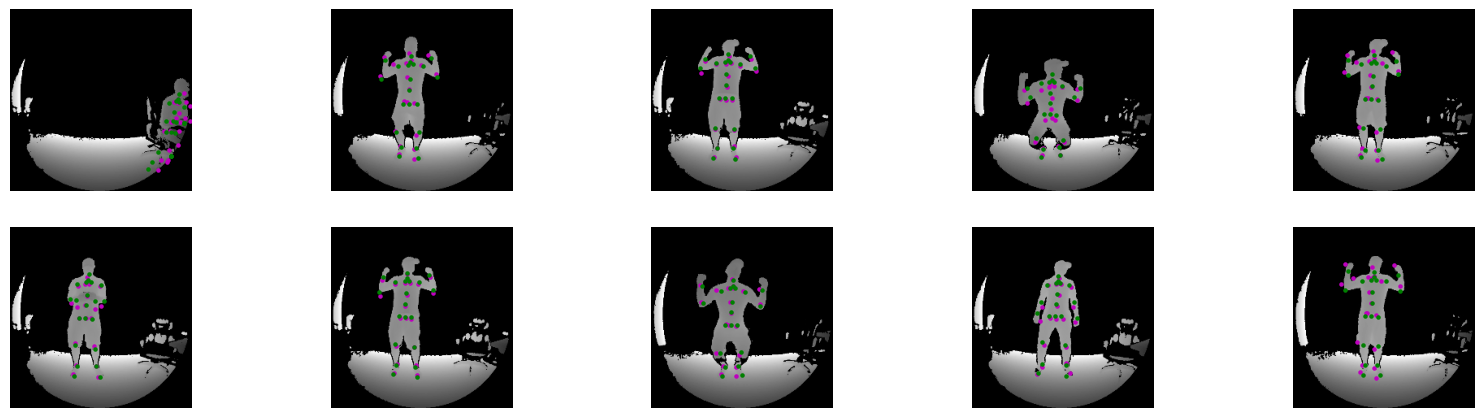

In [3]:
torch.save(net.state_dict(), model_path)
test_images, test_outputs, gt_pts = net_sample_output()
visualize_output(test_images.cpu(), test_outputs.cpu(), gt_pts.cpu())